<a href="https://colab.research.google.com/github/sanskarpyml/Titanic-Survival-Prediction/blob/main/titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()
train.shape
train['Survived'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,count
Survived,
0,549
1,342


In [4]:
train['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [5]:
train['Cabin'].value_counts()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


In [6]:
train['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [7]:
train['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


In [8]:
train['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


data preprocessing and Data cleaning



In [9]:
null_counts = train.isnull().sum()
print(null_counts)
train.head()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#filling null value of Age column
mean_age = train['Age'].mean()
train['Age'].fillna(mean_age, inplace=True)
#fill null value of Embarked column
most_frequent_embarked = train['Embarked'].mode()[0]
train['Embarked'].fillna(most_frequent_embarked, inplace=True)
#Dropping irrelevant features (Cabin, Ticket, Name).
train.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)
null_counts = train.isnull().sum()
print(null_counts)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


<ipython-input-10-4dde0af9670e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(mean_age, inplace=True)
<ipython-input-10-4dde0af9670e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [11]:
#Converting categorical features (Sex, Embarked) to numerical.
train['Sex'] = train['Sex'].replace({'male': 0, 'female': 1})
train['Embarked'] = train['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
train.head()

<ipython-input-11-3c15d9dffe19>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Sex'] = train['Sex'].replace({'male': 0, 'female': 1})
<ipython-input-11-3c15d9dffe19>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Embarked'] = train['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [12]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.000000,1,0,7.2500,0
1,2,1,1,1,38.000000,1,0,71.2833,1
2,3,1,3,1,26.000000,0,0,7.9250,0
3,4,1,1,1,35.000000,1,0,53.1000,0
4,5,0,3,0,35.000000,0,0,8.0500,0
5,6,0,3,0,29.699118,0,0,8.4583,2
6,7,0,1,0,54.000000,0,0,51.8625,0
7,8,0,3,0,2.000000,3,1,21.0750,0
8,9,1,3,1,27.000000,0,2,11.1333,0
9,10,1,2,1,14.000000,1,0,30.0708,1


  DATA Visualization

<ipython-input-14-39c91f501c5c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=train, palette='Set2')


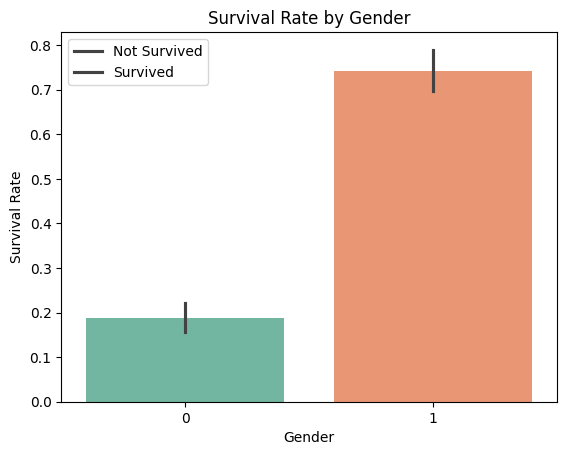

In [14]:
#gender vs survival bar plot
sns.barplot(x='Sex', y='Survived', data=train, palette='Set2')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.legend(['Not Survived', 'Survived'])
plt.show()


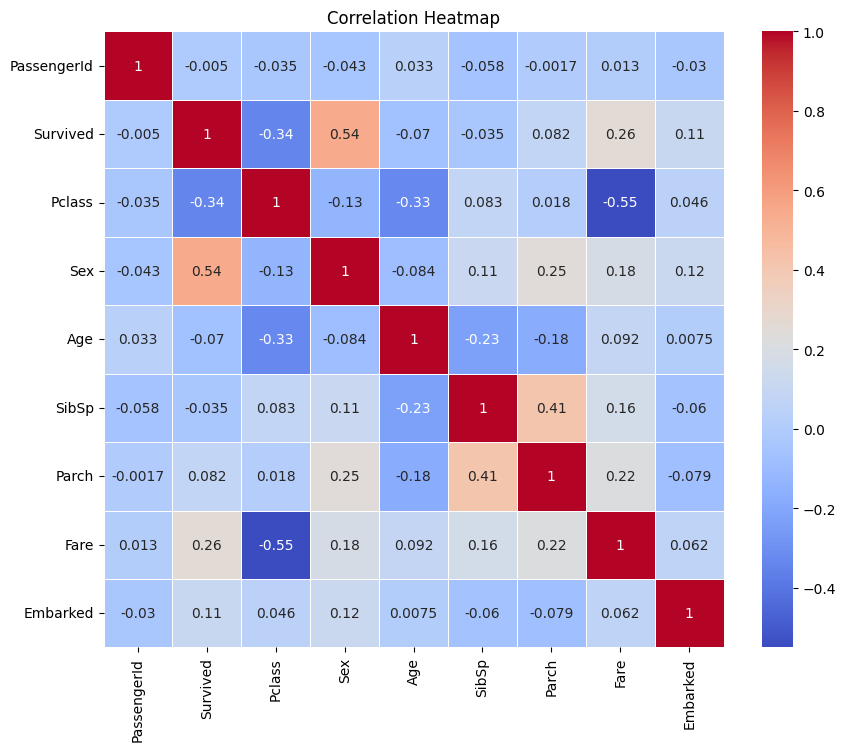

In [15]:
#correlation heatmap(find relation between variable)
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
#feature_selection
X = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Y = train['Survived']

In [17]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [18]:
#MODEL SELECTION AND TRAINING
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [19]:
#model evaluation
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of training data : ', training_data_accuracy)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of training data :  0.9803370786516854
Accuracy score of test data :  0.7877094972067039


In [20]:
#making prediction with new dataset
# Load the test dataset
test_data = pd.read_csv('test.csv')
test_data.head()  # Verify the dataset


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
# Fill missing values
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
test_data['Sex'] =train['Sex'].replace({'male': 0, 'female': 1})  # Assuming 'le' is the LabelEncoder you used
test_data['Embarked'] = train['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
test_data.head(10)

<ipython-input-21-a3cd4bb6f6d7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
<ipython-input-21-a3cd4bb6f6d7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,0
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,2
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,NaN,0
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,0
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,NaN,1


In [22]:
# Select the features (same as in training)
X_test = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
# Predict survival for the test dataset
predictions = model.predict(X_test)
print(predictions)

[0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0
 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0
 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1
 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0
 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1
 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0
 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1
 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0
 0 1 1 1 1 1 0 0 1 1 1]


In [23]:
# Add predictions and corresponding passenger info
test_data['Predicted_Survived'] = predictions

# Save the predictions along with PassengerId
test_data[['PassengerId', 'Predicted_Survived']].to_csv('test_predictions_with_ids.csv', index=False)


In [24]:
test_prediction = pd.read_csv('test_predictions_with_ids.csv')
test_prediction.head()

,PassengerId,Predicted_Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,0
